In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bestseller-detailed-eda/bestsellers Detailed EDA.csv
/kaggle/input/amazon-logo/Amazon_logo.svg


# **EDA on Amazon Best Seller Books**

[Logo](https://en.wikipedia.org/wiki/Amazon_(company)#/media/File:Amazon_logo.svg)

#### ___Amazon is an American multinational technology company focusing on e-commerce, cloud computing, online advertising, digital streaming, and artificial intelligence. It is considered one of the Big Five American technology companies, alongside Alphabet (parent company of Google), Apple, Meta (parent company of Facebook) and Microsoft.___


#### ___EDA:- Exploratory Data Analysis  is used by data scientists to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods. EDA is normally carried out as a preliminary step before undertaking extra formal statistical analyses or modeling.___


#### ___Amazon.com is one of the largest online marketplace and many people around the world purchase products.___
#### ___In this notebook, we observe the data about top 50 bestselling books from 2009 to 2019 on Amazon.___


# ___DataSource :-___

[DataSourse)(/kaggle/input/bestseller-detailed-eda)

#### ___Dataset on Amazon's Top 50 bestselling books from 2009 to 2019. Contains 550 books, data has been categorized into fiction and non-fiction using Goodreads.___

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

#### ___We have used numpy , pandas , plotly library for further Analysis.___
#### ___Numpy - NumPy is a Python library used for working with arrays.___
#### ___Pandas -Pandas is a Python library used for working with data sets. It has functions for analyzing, cleaning, exploring, and manipulating data.___
#### ___Plotly - Plotly is an open-source module of Python that is used for data visualization and supports various graphs like line charts, scatter plots, bar charts, histograms, area plots, etc.___
#### ___Matplotlib.pyplot and seaborn are both used in visualization.___

#### ___Loading the data from the data frame.___

In [3]:
books = pd.read_csv("/kaggle/input/bestseller-detailed-eda/bestsellers Detailed EDA.csv")
books.head() 

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


#### * ___The 'Name' column contains the title of the book.___
#### * ___The 'Author' column lists the name of the author.___
#### * ___'User Rating' provides the average user rating for the book.___
#### * ___'Reviews' shows the number of reviews the book has received.___
#### * ___'Price' indicates the cost of the book.___
#### * ___'Year' represents the year the book was a bestseller.___
#### * ___'Genre' specifies whether the book is fiction or non-fiction.___

In [4]:
books.shape

(550, 7)

#### ___There are 550 rows and 7 columns in the dataset.___

#### ___From the descriptive statistics, we can see the count, mean, standard deviation, minimum, quartiles, and maximum for numerical columns such as user ratings, reviews, price, and year. The missing values check indicates that there are no null values in the dataset, which means that data cleaning for null values may not be necessary.___

#### ___Next steps could include:___

#### ___* Exploring the distribution of numerical variables with histograms.___
#### ___* Analyzing the relationship between different variables using scatter plots or correlation matrices.___
#### ___* Investigating the top authors, books, and genres within the dataset.___
#### ___* Examining trends over the years for prices and ratings.___

In [5]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [6]:
duplicate_rows_df = books[books.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 7)


#### ___no duplicate rows___

In [7]:
books.count()      # Used to count the number of rows

Name           550
Author         550
User Rating    550
Reviews        550
Price          550
Year           550
Genre          550
dtype: int64

In [8]:
print(books.isnull().sum())

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64


##### no Null Value

### ___Data visualisation___

#### ___Next, I will plot some distributions to visualize the data further.___
#### ___Using User Rating as it is the most important considerations as it briefs us about customer preference rating.___
#### ___And it shows how the book is popular.The rating is a maximum of 5 points, and the higher the value is, the higher the evaluation is.___

#### ___You should choose a bar chart when you want to compare different categories or types of data. But if you want to understand the distribution and frequency of a single set of data, go with a histogram.That's why we will use Histogram Here.___

In [9]:
fig = px.histogram(books, x="User Rating",labels={'':'The Number of Books'},title="User Rating Histogram")
fig.show()


* #### *According to the graph above, there is a little variation in User Rating.*
* #### *About 180 books have a rating of 4.8 or 4.9.*
* #### *In the meantime, the rating of 9 books is less than 4.0.*

*  Based on this information, we would like to divide the "Popularity" of books into four stages.
 ### Popularity Level - Ratings
* Extremely Popular - 4.8 or 4.9
* Very Popular - 4.5 ~ 4.7
* Fairly Popular - 4.0 ~ 4.4
* Popular - 3.3 ~ 3.9

In [10]:
popularity = [0,0,0,0]
for i in books["User Rating"]:
    if i >= 4.8:
        popularity[0] += 1
    elif i >= 4.5:
        popularity[1] += 1
    elif i >= 4.0:
        popularity[2] += 1
    else:
        popularity[3] += 1

In [11]:
x = ['Extremely Popular(4.8, 4.9)','Very Popular(4.4 - 4.7)','Fairly Popular(4.0 - 4.3)','Popular (- 3.9)']
fig = go.Figure([go.Bar(x=x, y=popularity)])
fig.update_layout(title_text='Popularity of Books Accourdind to  User Rating')
fig.show()

###### ___Now we will print Authors Name and Books with User Rating___

In [12]:
fig = go.Figure(data=[go.Table(
    header=dict(values=['Book Title','Author'],
                fill_color='paleturquoise',
                line_color='blue',
                align='left'),
    cells=dict(values=[books[books["User Rating"] == 4.9]["Name"],books[books["User Rating"] == 4.9]["Author"]],
               fill_color='lavender',
               align='left'))
])
fig.update_layout(title='Books Rated 4.9 Note* you can scroll down to discover complete list')
fig.show()

### ___Does Name affects the popularity of the book?___
#### ___The name of books is very important, because readers get a first impression from it(as we all know first impresssion is last impression).___
##### ___Short analysis the book which has short title is not always popular, and vice versa.However, the short title has the advantage of being simple and easy to understand, and the long title has that of giving readers an accurate understanding of what the book is like.Then, we try to find out the relationships between the length of name and rating.___

In [13]:
name_len = []
for i in books["Name"]:
    name_len.append(len(i))

In [14]:
fig = go.Figure(data=[go.Histogram(x=name_len)])
fig.update_layout(title_text='Names Lengthwise')
fig.show()


#### * ___It is interesting that there is a big variation in the length of book name.___
#### * ___There are many books which has the short title, but some books have very long title.___

#### ___So There could be a Relationship between Popularity and Length of Name!___

In [15]:
books["Name Length"] = name_len
fig = px.scatter_matrix(books, dimensions=["User Rating","Name Length"], color="User Rating",title="Scatter Plot shows the relationship between Rating and the Length of Book Title")
fig.show()


#### ___with the above plot we can say there is no correlation between these two things (User Rating and Name Length)___

#### ___Now we will look for Author: Who Wrote the Bestselling Book?___

#### * ___The column "Author" shows the name of the author who wrote the bestselling book.___*
#### * ___There are very few authors who can write bestselling books.___*

In [16]:
print("We have " + str(len(books["Author"].unique())) + " best-selling authors.")

We have 248 best-selling authors.


In [17]:
authors = books["Author"].value_counts()
author_times = []
author_names = []
for i in range(len(authors)):
    author_names.append(authors.keys()[i])
    author_times.append(authors[i])

### ___The author who wrote the most a lot of bestselling books is..."Jeff Kinney" (12 Works)___

In [18]:
popular_authors = pd.DataFrame({"Author":author_names,"Number of Times":author_times})
popular_authors

,Author,Number of Times
0,Jeff Kinney,12
1,Gary Chapman,11
2,Rick Riordan,11
3,Suzanne Collins,11
4,American Psychological Association,10
...,...,...
243,Keith Richards,1
244,Chris Cleave,1
245,Alice Schertle,1
246,Celeste Ng,1


In [19]:
fig = px.bar(popular_authors, y='Author', x='Number of Times',title="Best-Selling Authors")
fig.show()


### ___The bar graph above shows that some of the bestselling authors have received high praise over several years, and some have written several bestselling books.___

### ___Reviews: The Number of Reviews by Readers___

##### * ___The column "Reviews" shows the number of reviews.___
##### * ___On Amazon.com, reviews are very reliable and essential information.___
##### * ___Many consumers dicede whether or not to buy something by referring other's reviews.___
##### * ___A large number of reviews indicates that so many readers want to evaluate the book, so we can guess that there is a relationship between popularity and the number of reviews.___

In [20]:
fig = px.histogram(books, x="Reviews",labels={'':'The Number of Books'},title="Reviews Histogram")
fig.show()

#### * ___There is a little variation in the number of reviews.___
#### * ___Only a few books have more than 50k reviews.___

#### ___The Bestselling Book which has the most reviews is..."Where the Crawdads Sing" (87841 Reviews)___

In [21]:
fig = px.scatter_matrix(books, dimensions=["User Rating","Reviews"], color="User Rating",title="Scatter Plot shows the relationship between Rating and Reviews")
fig.show()


#### * ___According to the graph above, we can see that there is no correlation between User Rating and the number of reviews.___
#### * ___However, the graph also shows that books which have relatively low rateing do not have many reviews.___

### ___Price :- How much is the book?___

#### * ___The column "Price" shows the price of books (US dollars).___
#### * ___Unlike groceries 🍅🍇, books are not sold well just because they are inexpensive.___
#### * ___However, it is also true that children or people who do not usually read books can easily buy inexpensive books.___

In [22]:
fig = px.histogram(books, x="Price",labels={'':'The Number of Books'},title="Price Histogram")
fig.show()


#### * ___Most of bestselling books are priced at less than 20 dollars.___
#### * ___Except for specialized books, most of books can be bought for less than 20 dollars, so there is no surprise.___

#### ___The most Expensive Bestselling Book is... "Diagnostic and Statistical Manual of Mental Disorders, 5th Edition: DSM-5" ($105)___

In [23]:
fig = px.scatter_matrix(books, dimensions=["User Rating","Price"], color="User Rating",title="Scatter Plot shows the relationship between Rating and Price")
fig.show()

#### * ___We can see that there is no correlation between Rating and Price.___
#### * ___However, books with particularly high prices (more than 50 dollars) are generally high evaluated.___
#### * ___This is probably because expensive books are bought by only those who really need them.___
#### * ___(e.g. specialized books are bought by only scholars and researchers, not people who are not familiar with the field.)___

### ___Genre:- Is the Book Fiction or Non-fiction?___

##### ___The column "Genre" shows whether the book is fiction or non-fiction.___

In [24]:
fig = px.histogram(books, x="Genre",labels={'':'The Number of Books'},title="Book Genre Histogram")
fig.show()

#### ___We can see that there are more non-fiction books than fiction.___

In [25]:
fig = px.scatter_matrix(books, dimensions=["User Rating","Genre"], color="User Rating",title="Scatter Plot shows the relationship between Rating and Genre")
fig.show()


#### ___We can see that all non-fiction books have a 4.0 or higher rating, while some of fiction books have a relatively low rating.___

#### ___Now let's generate some graphs to analyze relationships between different variables.___
#### ___Set the aesthetic style of the plots___

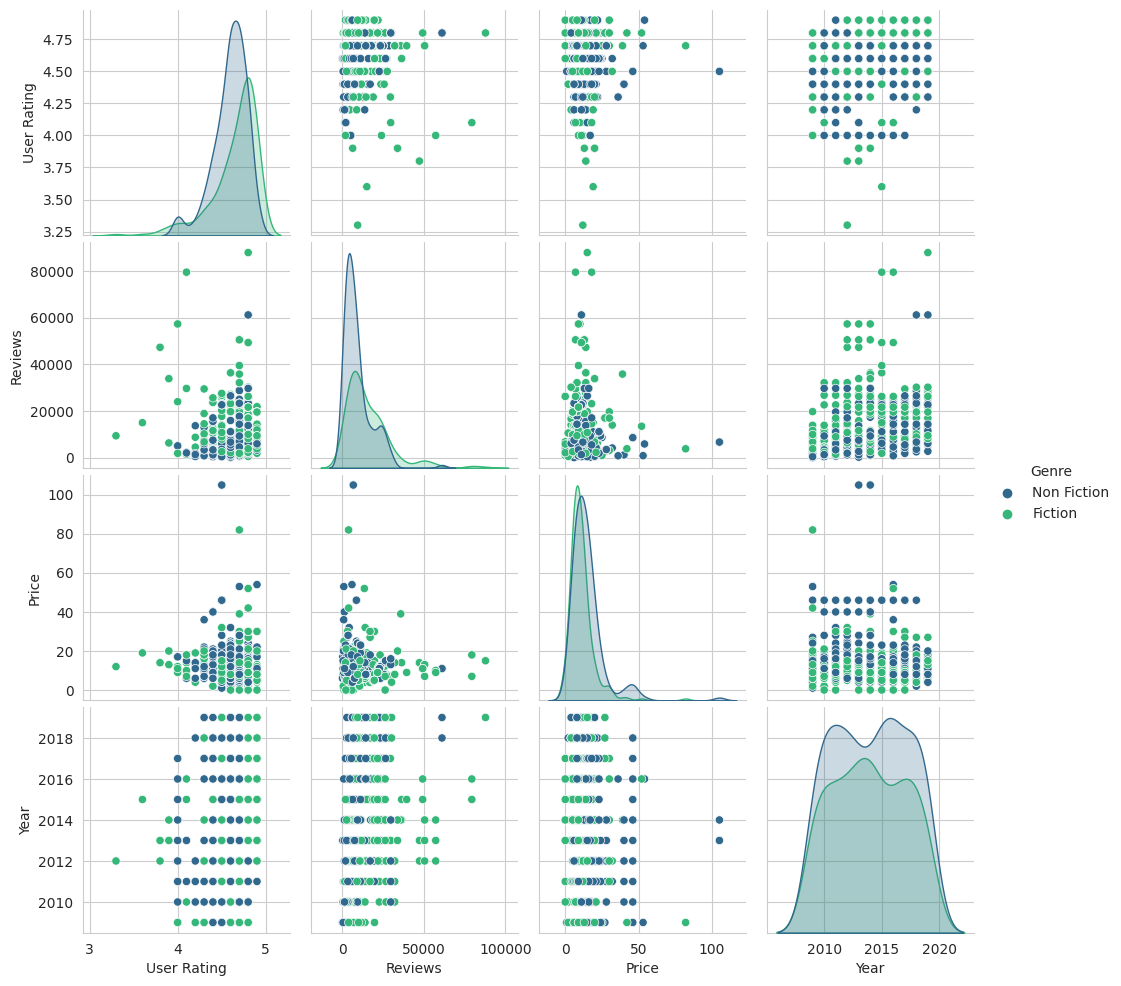

In [26]:

sns.set_style('whitegrid')
sns.pairplot(books, vars=['User Rating', 'Reviews', 'Price', 'Year'], hue='Genre', palette='viridis')
plt.show()

#### ___Here are the generated graphs:_The pairplot showing relationships between 'User Rating', 'Reviews', 'Price', and 'Year', with data points colored by 'Genre'___

#### ___Graphs:-___


#### ___The generated graphs provide insights into the dataset:___

#### ___The count plot shows the number of fiction versus non-fiction bestsellers.___
#### ___The boxplots compare user ratings and prices between fiction and non-fiction genres.___
#### ___The line plots illustrate the trends in average price and user rating of bestsellers over the years from 2009 to 2019.___
#### ___Here are the visualizations:___

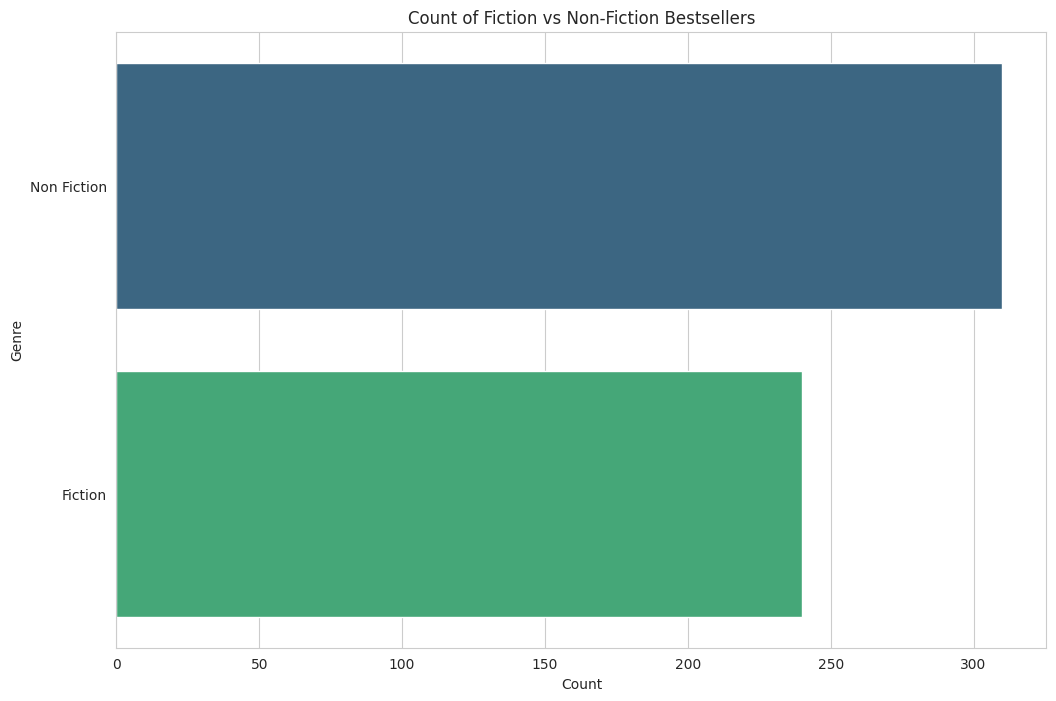

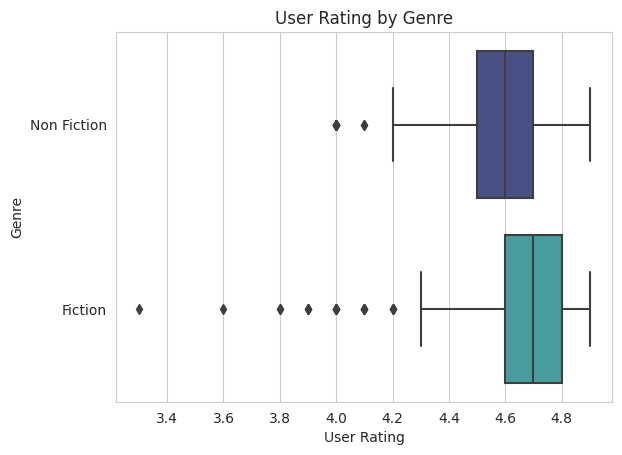

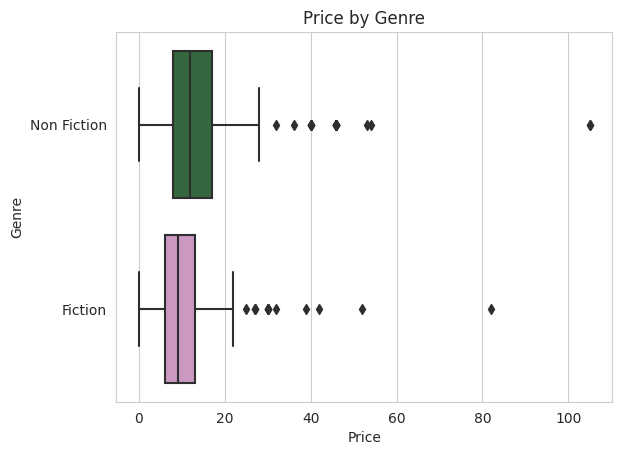

/tmp/ipykernel_20/2839840706.py:31: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




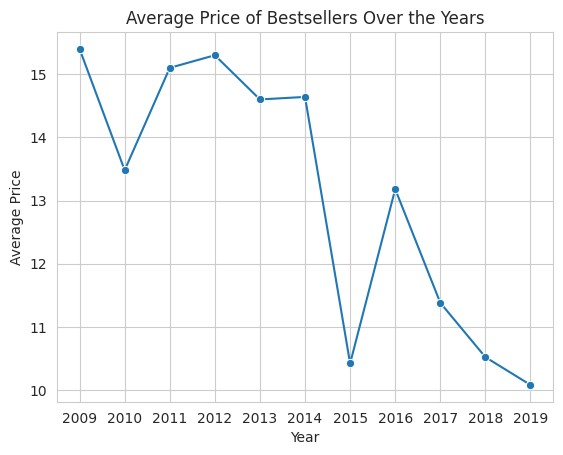

/tmp/ipykernel_20/2839840706.py:39: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




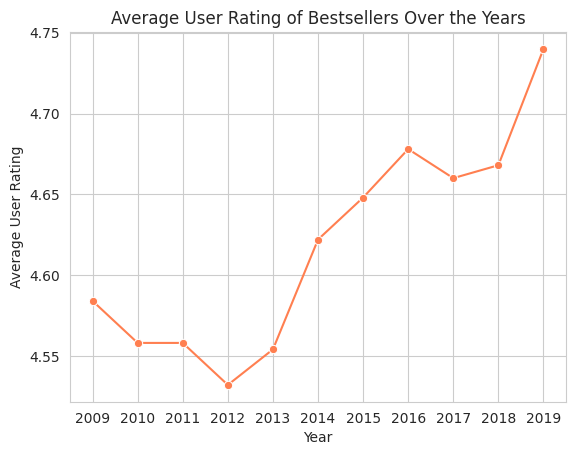

In [27]:
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(12, 8))

# Count plot for Genre
sns.countplot(y='Genre', data=books, palette='viridis')
plt.title('Count of Fiction vs Non-Fiction Bestsellers')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

# Boxplot for User Ratings by Genre
sns.boxplot(x='User Rating', y='Genre', data=books, palette='mako')
plt.title('User Rating by Genre')
plt.xlabel('User Rating')
plt.ylabel('Genre')
plt.show()

# Boxplot for Price by Genre
sns.boxplot(x='Price', y='Genre', data=books, palette='cubehelix')
plt.title('Price by Genre')
plt.xlabel('Price')
plt.ylabel('Genre')
plt.show()

# Lineplot for Average Price over the Years
sns.lineplot(x='Year', y='Price', data=books, ci=None, marker='o')
plt.title('Average Price of Bestsellers Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.xticks(range(2009, 2020))
plt.show()

# Lineplot for Average User Rating over the Years
sns.lineplot(x='Year', y='User Rating', data=books, ci=None, marker='o', color='coral')
plt.title('Average User Rating of Bestsellers Over the Years')
plt.xlabel('Year')
plt.ylabel('Average User Rating')
plt.xticks(range(2009, 2020))
plt.show()

##                                          ___Conclusion:-___

#### * ___The visual analysis of the Amazon Top 50 Bestselling Books dataset provided the following insights:___
#### * ___No clear correlation between user rating and other features was observed, but we could find some weak correlations.___
#### * ___The pairplot indicates that there are distinct clusters for different genres across various variable interactions, suggesting genre-specific trends in user ratings, reviews, and pricing.___
#### * ___The Scatterplot reveals that there is a very weak correlation between the numerical variables, indicating that factors such as user ratings, reviews, and price do not strongly predict each other.___
#### * ___These insights can be valuable for publishers and authors to understand the dynamics of book sales and ratings on Amazon.___